# Reading in the dataset

I do not take any credit for this dataset, this was found on kaggle!

The original dataset can be found here:

[Kaggle: Earthquake in Japan](https://www.kaggle.com/datasets/stpeteishii/earthquake-in-japan)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('japan_2000_2023_query.csv')

## Inspecting the dataset
Viewing the first 5 rows of our dataset

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-02T07:19:01.487Z,32.5313,135.7405,16.123,4.5,mb,30.0,95.0,1.970,0.44,...,2023-03-02T08:13:16.040Z,"135 km S of Shing?, Japan",earthquake,5.07,4.815,0.131,18.0,reviewed,us,us
1,2023-03-02T06:47:39.954Z,33.3315,139.4942,9.945,5.1,mww,65.0,77.0,0.344,0.49,...,2023-03-02T07:07:30.040Z,"157 km SSE of Shimoda, Japan",earthquake,5.01,4.540,0.073,18.0,reviewed,us,us
2,2023-03-02T06:14:51.230Z,43.4055,147.2168,40.090,5.2,mb,91.0,116.0,3.299,0.81,...,2023-03-02T06:34:17.040Z,"59 km SE of Shikotan, Russia",earthquake,8.74,6.763,0.024,558.0,reviewed,us,us
3,2023-02-28T15:48:02.842Z,35.6762,140.7823,43.894,4.5,mwr,27.0,139.0,2.261,0.65,...,2023-02-28T16:49:02.040Z,"7 km SW of Hasaki, Japan",earthquake,6.74,5.915,0.089,12.0,reviewed,us,us
4,2023-02-28T11:12:09.077Z,32.9764,141.6939,10.000,5.2,mww,136.0,93.0,1.585,0.79,...,2023-02-28T11:32:11.040Z,"272 km SSE of Katsuura, Japan",earthquake,6.71,1.847,0.083,14.0,reviewed,us,us


In [4]:
removed_cols = ['magSource', 'locationSource', 'magNst']

df = df.drop(removed_cols, axis=1)

In [5]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11132 non-null  object 
 1   latitude         11132 non-null  float64
 2   longitude        11132 non-null  float64
 3   depth            11132 non-null  float64
 4   mag              11132 non-null  float64
 5   magType          11132 non-null  object 
 6   nst              7522 non-null   float64
 7   gap              10110 non-null  float64
 8   dmin             3833 non-null   float64
 9   rms              11054 non-null  float64
 10  net              11132 non-null  object 
 11  id               11132 non-null  object 
 12  updated          11132 non-null  object 
 13  place            11103 non-null  object 
 14  type             11132 non-null  object 
 15  horizontalError  3305 non-null   float64
 16  depthError       8001 non-null   float64
 17  magError    

## Removing Nuclear Explosions

We are only going to be working with Earthquakes and do not want to include nuclear explosion.

In [7]:
num_unique_type = df.type.unique()
num_unique_type

array(['earthquake', 'nuclear explosion'], dtype=object)

In [8]:
df = df[df['type'] != 'nuclear explosion']
unique_fixed = df.type.unique()
unique_fixed

array(['earthquake'], dtype=object)

## Viewing Earthquakes by Magnitude / Depths

Taking a first look at the different earthquake magnitudes and depths


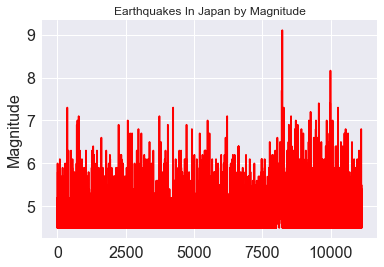

In [9]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(df['mag'], color='red')

ax.set_title("Earthquakes In Japan by Magnitude")
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Magnitude", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

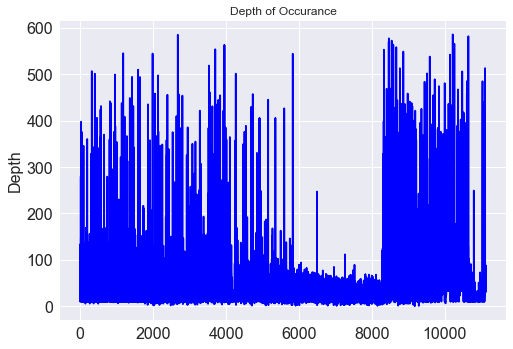

In [10]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(df['depth'], color='blue')

ax.set_title("Depth of Occurance")
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Depth", fontsize=16)
ax.tick_params(labelsize=16)

## Standardizing Depth and Magnitude

Standardizing the depth and magnitude to prepare them to be plotted to see if there is any sort of correlation


In [11]:
mag = df['mag']
depth = df['depth']

scaler = StandardScaler()
#Standardizing the magnitude
reshaped_mag = np.array(mag).reshape(-1,1)
mag_scaler = scaler.fit_transform(reshaped_mag)

#Standardizing the depth
reshaped_depth = np.array(depth).reshape(-1, 1)
depth_scaler = scaler.fit_transform(reshaped_depth)



## Graphing the standardized data

After standardizing the data I want to see if there is any corilation between the two *mag* and *depth*

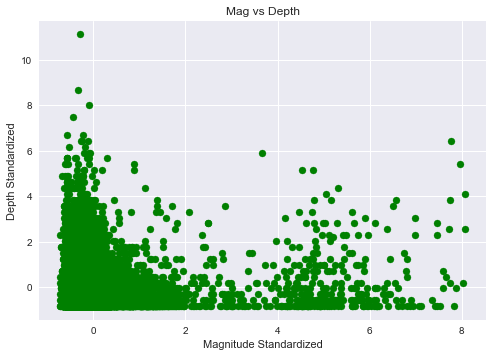

In [12]:
#Graphing the standardized data
plt.scatter(depth_scaler, mag_scaler, color='green')
plt.title("Mag vs Depth")
plt.xlabel('Magnitude Standardized')
plt.ylabel('Depth Standardized')
plt.show()
